In [105]:
import pandas as pd
import numpy as np

# 读取文件数据

In [106]:
# 读取Excel文件
data = pd.read_excel('p1_data.xlsx')
data.head()

,ID,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,...,平均每次食用量.26,植物油,动物油,盐,酱油,醋,酱类,味精,身高,体重
0,10001,NaN,5.0,NaN,NaN,2.0,1.0,2.0,NaN,5.0,...,NaN,6.0,0.0,10.0,1.0,1.0,0.0,0.0,161.5,50.5
1,10002,NaN,7.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,...,2.0,7.0,0.0,15.0,1.0,1.0,5.0,0.0,166.0,48.5
2,10003,4.0,1.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,...,1.0,6.0,0.0,20.0,2.0,0.0,0.0,0.0,183.0,64.0
3,10004,NaN,7.0,NaN,NaN,NaN,3.0,3.0,NaN,7.0,...,0.5,8.0,0.0,6.0,1.0,1.0,0.0,0.0,177.2,78.5
4,10005,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,...,NaN,3.0,0.0,5.0,1.0,0.0,0.0,0.0,173.6,73.0


# 计算BMI指数

In [107]:
data['BMI'] = data['体重'] / ((data['身高']/100)**2)

In [108]:
data.head()

,ID,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,...,植物油,动物油,盐,酱油,醋,酱类,味精,身高,体重,BMI
0,10001,NaN,5.0,NaN,NaN,2.0,1.0,2.0,NaN,5.0,...,6.0,0.0,10.0,1.0,1.0,0.0,0.0,161.5,50.5,19.361827
1,10002,NaN,7.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,...,7.0,0.0,15.0,1.0,1.0,5.0,0.0,166.0,48.5,17.600523
2,10003,4.0,1.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,...,6.0,0.0,20.0,2.0,0.0,0.0,0.0,183.0,64.0,19.110753
3,10004,NaN,7.0,NaN,NaN,NaN,3.0,3.0,NaN,7.0,...,8.0,0.0,6.0,1.0,1.0,0.0,0.0,177.2,78.5,25.000127
4,10005,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,...,3.0,0.0,5.0,1.0,0.0,0.0,0.0,173.6,73.0,24.222748


# 删除 是否吃XX 中NaN的整行数据

In [109]:
# 指定要计算 value_counts() 的列的下标
column_indices = [22, -10, 5]

# 计算多个列的 value_counts()
value_counts = data.iloc[:, 22:-10:5].apply(pd.value_counts, dropna=False)
value_counts = value_counts.iloc[:3,:]
value_counts

,是否吃大米,是否吃小麦面粉,是否吃杂粮,是否吃薯类,是否吃油炸面食,是否吃猪肉,是否吃牛羊肉,是否吃禽肉,是否吃内脏类,是否吃水产类,...,是否吃干豆,是否吃新鲜蔬菜,是否吃海草类,是否吃咸菜,是否吃泡菜,是否吃酸菜,是否吃糕点,是否吃水果,是否吃果汁饮料,是否吃其他饮料
1.0,7697,6400,6053,6551,2699,7591,5375,7251,4313,7322,...,5060,7664,6051,4857,1977,3628,5668,7584,4420,3743
2.0,8,1292,1642,1152,5008,112,2326,453,3382,382,...,2632,43,1653,2849,5726,4076,2036,120,3276,3891
NaN,4,17,14,6,2,6,8,5,14,5,...,17,2,5,3,6,5,5,5,13,75


In [110]:
# 创建要删除的列的下标列表
delete_columns = data.columns[22:-10:5]
delete_columns
data.dropna(subset=delete_columns, inplace=True)
data

,ID,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,工作日在家吃早餐人数,周末在家吃早餐人数,不吃中餐,在家吃中餐,...,植物油,动物油,盐,酱油,醋,酱类,味精,身高,体重,BMI
0,10001,NaN,5.0,NaN,NaN,2.0,1.0,2.0,NaN,5.0,...,6.0,0.0,10.0,1.0,1.0,0.0,0.0,161.5,50.5,19.361827
1,10002,NaN,7.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,...,7.0,0.0,15.0,1.0,1.0,5.0,0.0,166.0,48.5,17.600523
2,10003,4.0,1.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,...,6.0,0.0,20.0,2.0,0.0,0.0,0.0,183.0,64.0,19.110753
3,10004,NaN,7.0,NaN,NaN,NaN,3.0,3.0,NaN,7.0,...,8.0,0.0,6.0,1.0,1.0,0.0,0.0,177.2,78.5,25.000127
4,10005,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,...,3.0,0.0,5.0,1.0,0.0,0.0,0.0,173.6,73.0,24.222748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,17705,5.0,NaN,NaN,NaN,2.0,2.0,4.0,NaN,7.0,...,10.0,0.0,10.0,1.0,0.0,5.0,0.5,159.0,59.0,23.337684
7705,17706,5.0,1.0,NaN,NaN,1.0,5.0,5.0,NaN,4.0,...,7.0,0.5,10.0,1.2,0.2,2.0,0.0,170.0,60.5,20.934256
7706,17707,NaN,6.0,NaN,NaN,1.0,5.0,8.0,NaN,7.0,...,7.0,0.0,20.0,2.0,0.0,10.0,0.0,158.5,62.0,24.679318
7707,17708,NaN,7.0,NaN,NaN,NaN,4.0,6.0,NaN,7.0,...,7.0,0.0,20.0,3.0,0.2,0.0,0.0,153.0,50.5,21.572899


# 统一食用频率的单位

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [23]:
heatmap_data = data.iloc[:, 1:]

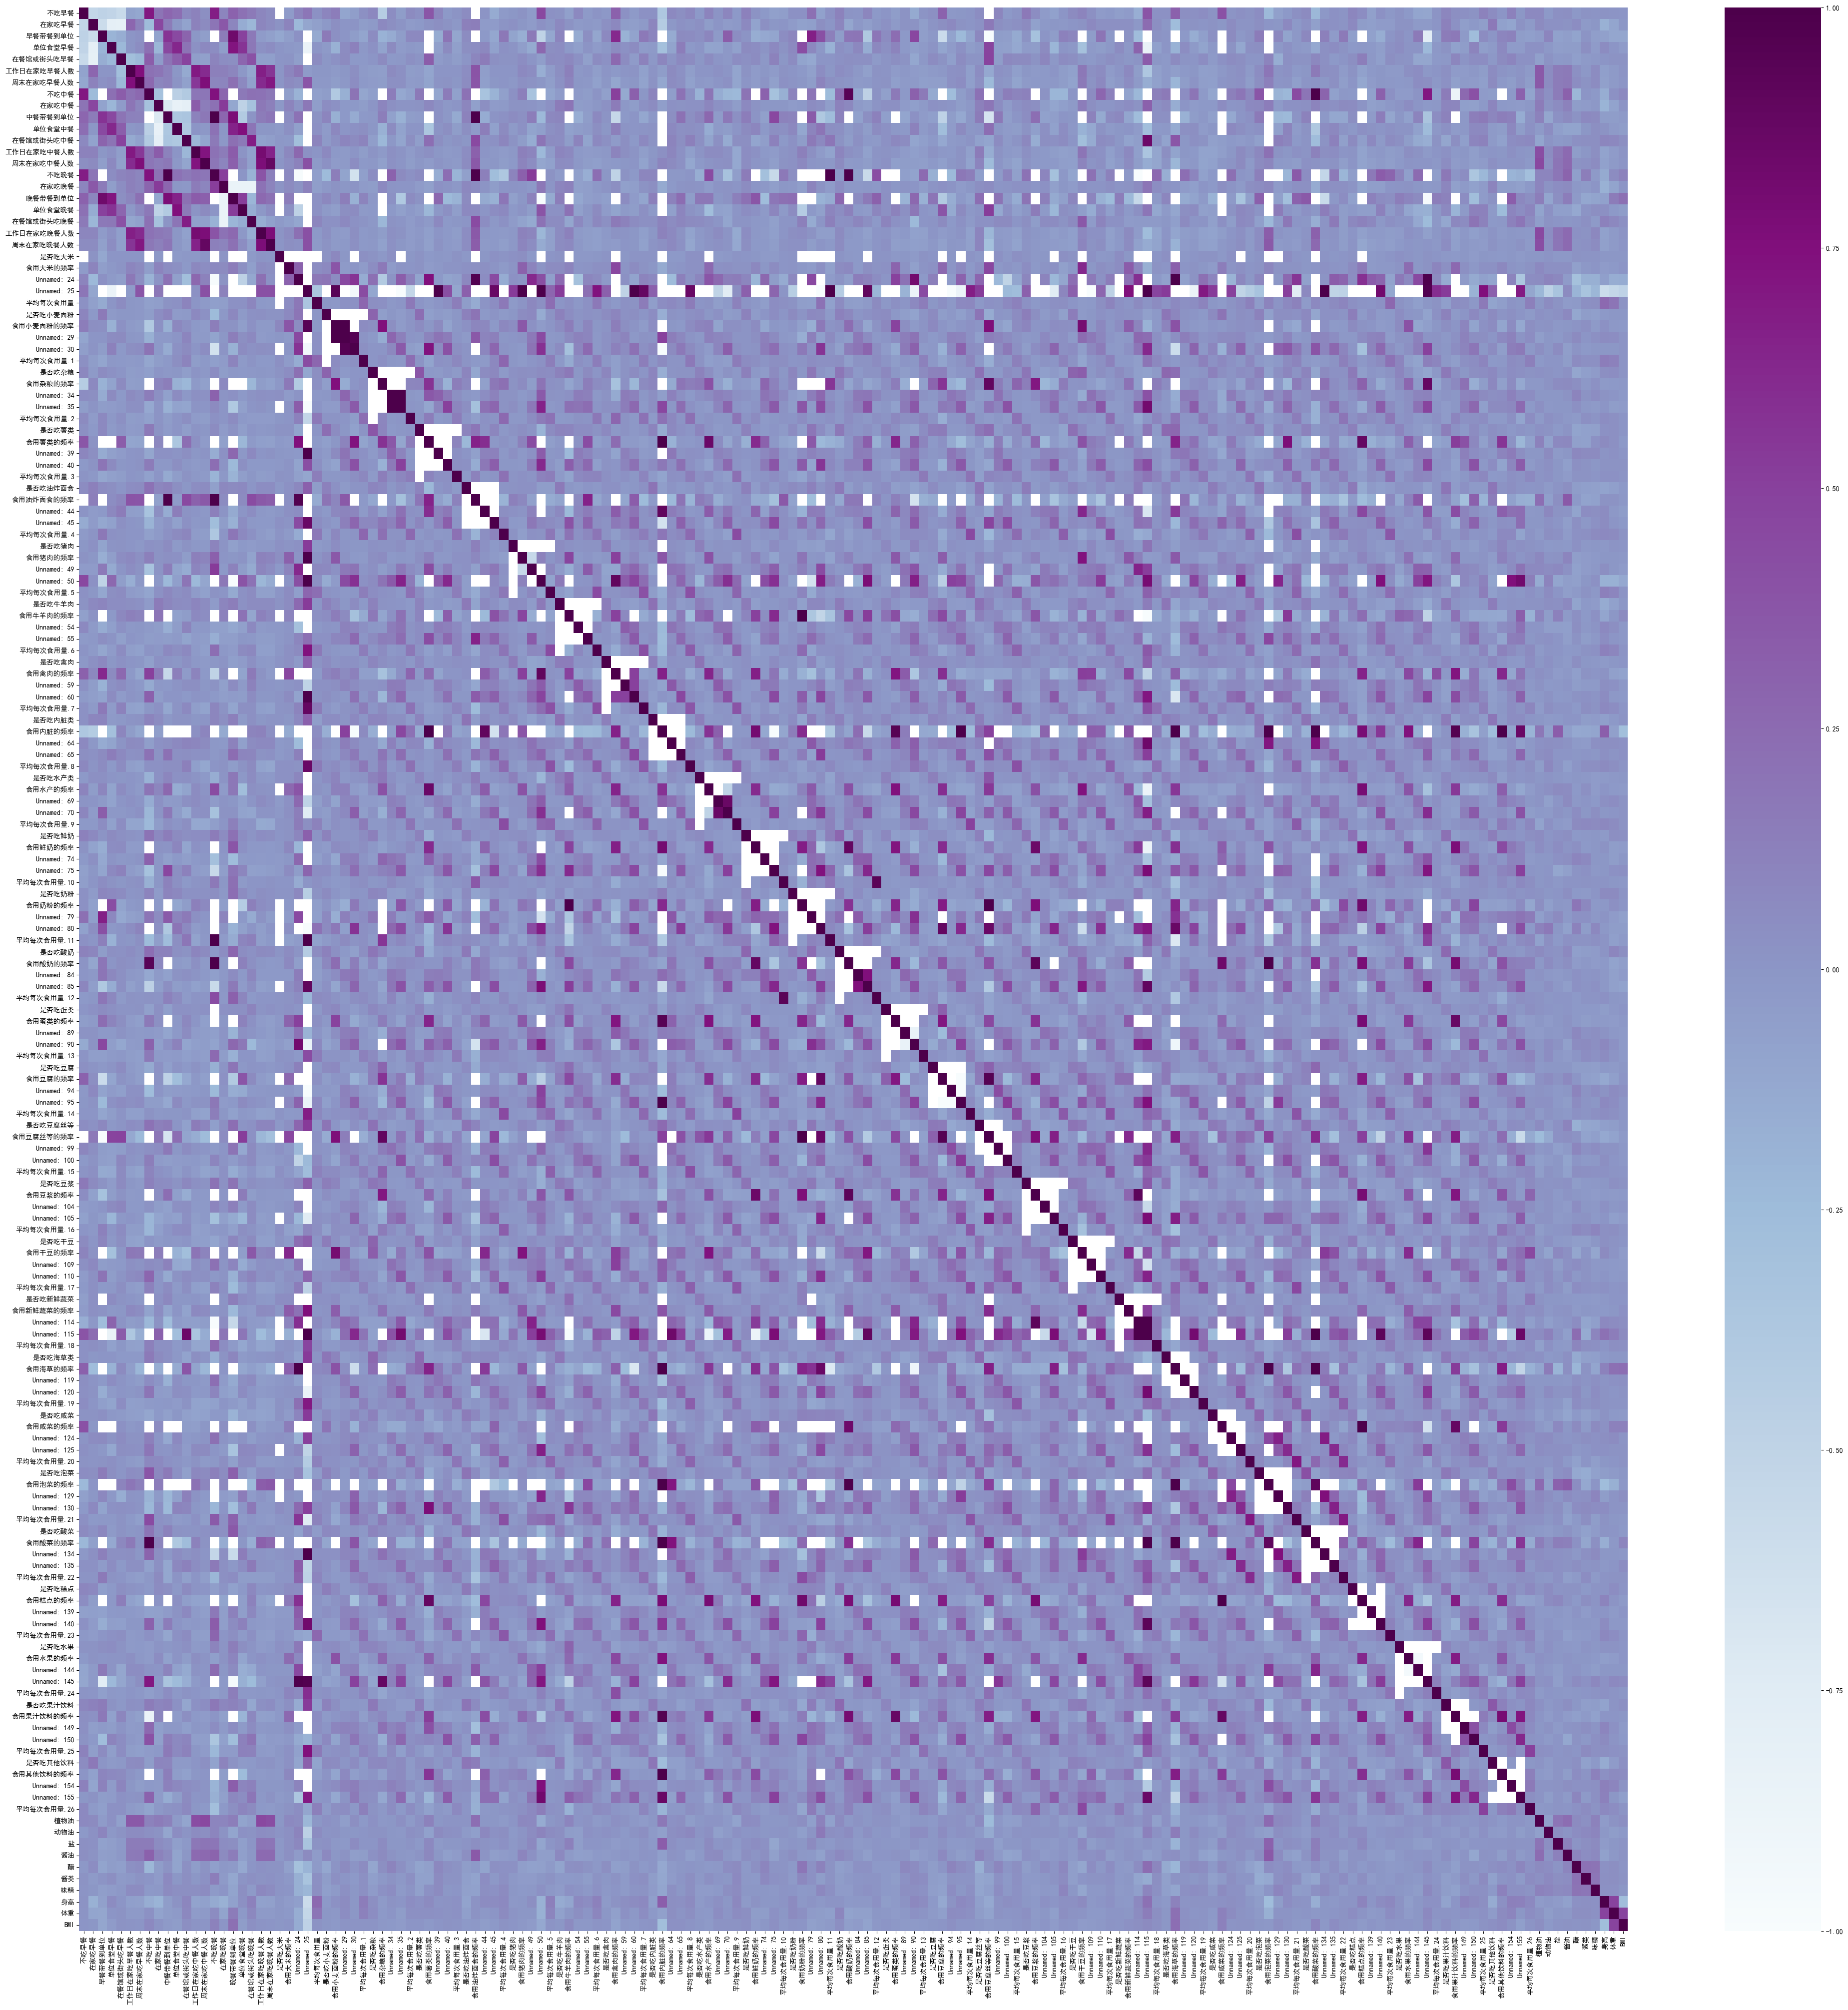

In [27]:
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False
# 绘制热力图
plt.figure(figsize=(50,50))
sns.heatmap(heatmap_data.corr(),cmap='BuPu',annot=False)
plt.show()